¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Este proceso es muy parecido al que se recibe de un gerente o de un Senior Data Scientist en un trabajo real, por lo que te estarás preparando para la experiencia en la vida real.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.

Necesitamos predecir si un cliente dejará el banco pronto. Tú tienes los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

Crea un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitas un valor F1 de al menos 0.59. Verifica F1 para el conjunto de prueba. 

Además, debes medir la métrica AUC-ROC y compararla con el valor F1.

Instrucciones del proyecto
Descarga y prepara los datos.  Explica el procedimiento.

Examina el equilibrio de clases. Entrena el modelo sin tener en cuenta el desequilibrio. Describe brevemente tus hallazgos.

Mejora la calidad del modelo. Asegúrate de utilizar al menos dos enfoques para corregir el desequilibrio de clases. Utiliza conjuntos de entrenamiento y validación para encontrar el mejor modelo y el mejor conjunto de parámetros. Entrena diferentes modelos en los conjuntos de entrenamiento y validación. Encuentra el mejor. Describe brevemente tus hallazgos.

Realiza la prueba final.

Descripción de los datos
Puedes encontrar los datos en el archivo  /datasets/Churn.csv file. Descarga el conjunto de datos.

Características

RowNumber: índice de cadena de datos
CustomerId: identificador de cliente único
Surname: apellido
CreditScore: valor de crédito
Geography: país de residencia
Gender: sexo
Age: edad
Tenure: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
Balance: saldo de la cuenta
NumOfProducts: número de productos bancarios utilizados por el cliente
HasCrCard: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
IsActiveMember: actividad del cliente (1 - sí; 0 - no)
EstimatedSalary: salario estimado
Objetivo

Exited: El cliente se ha ido (1 - sí; 0 - no)
Evaluación del proyecto
Hemos definido los criterios de evaluación para el proyecto. Lee esto con atención antes de pasar al ejercicio.

Esto es lo que los revisores buscarán cuando evalúen tu proyecto:

¿Cómo preparaste los datos para el entrenamiento? ¿Procesaste todos los tipos de características?
¿Explicaste los pasos de preprocesamiento lo suficientemente bien?
¿Cómo investigaste el equilibrio de clases?
¿Estudiaste el modelo sin tener en cuenta el desequilibrio de clases?
¿Qué descubriste sobre la investigación del ejercicio?
¿Dividiste correctamente los datos en conjuntos?
¿Cómo trabajaste con el desequilibrio de clases?
¿Utilizaste al menos dos técnicas para corregir el desequilibrio?
¿Realizaste correctamente el entrenamiento, la validación y las pruebas finales del modelo?
¿Qué tan alto es tu valor F1?
¿Examinaste los valores AUC-ROC?
¿Mantuviste la estructura del proyecto y el código limpio?
Ya tienes las hojas informativas y los resúmenes de capítulos, tienes todo para continuar con el proyecto.

¡Buena suerte!

<div class='alert alert-info'>
Estimado revisor, espero que estes muy bien. El presente notebook es una entrega parcial, no el resultado final del proyecto, sin embargo apreciaría mucho si puedes verificar que los procedimientos se alinien a lo solicitado. Los analisis detallados, conclusiones y algunas graficas serán adicionadas para una segunda entrega. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

De acuerdo, te daré los comentarios necesarios para que puedas avanzar con tu proyecto :)
</div>

# Account closure predictor for BetaBank bank users

## Dependencies

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np

## Loading dataset

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. Usaste correctamente una celda independiente para importar las librerías y otra para leer los datos.
</div>

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.duplicated().sum()

0

In [7]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de los métodos de pandas para explorar los datos.
</div>

## Features

The `Surname` is not relevant for our perdictor, and in adittion if we try to use one hot enconder over the `Surname` column it will generate a huge amount of new columns. For that reason the columns we will include as features are:

In [8]:
features_columns = ['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']
features = data[features_columns]
target = data['Exited']

### Encoding

There are some categorical variable we need to encode, those are `Geography` (Nominal), `Gender`(nominal)

In [9]:
features = pd.get_dummies(features)

### Scaling 

In [10]:
numeric_columns = ['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features[numeric_columns])
features_scaled = features

features_scaled[numeric_columns] = scaler.transform(features[numeric_columns])

In [11]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.329200,0.289040,-1.035627,-1.227780,-0.912601,1,1,0.020264,1,0,0,1,0
1,-0.443301,0.194298,-1.381103,0.116887,-0.912601,0,1,0.214527,0,0,1,1,0
2,-1.542828,0.289040,1.037224,1.333920,2.529911,1,0,0.238632,1,0,0,1,0
3,0.500631,0.004815,-1.381103,-1.227780,0.808655,0,0,-0.110281,1,0,0,1,0
4,2.066937,0.383782,-1.035627,0.785996,-0.912601,1,1,-0.366132,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1.548293,-0.942603,-1.035627,-1.227780,0.808655,0,0,1.173038,1,0,0,1,0
9995,1.247479,0.004815,0.000798,-1.227780,0.808655,1,0,-0.067866,1,0,0,0,1
9996,-1.397607,-0.374153,1.728174,-0.307305,-0.912601,1,1,0.026354,1,0,0,0,1
9997,0.604360,-0.279411,0.691748,-1.227780,-0.912601,0,1,-1.008227,1,0,0,1,0


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! Trataste los datos correctamente, el escalado es correcto, aunque tal vez sería bueno guardarlo en un dataframe nuevo por ejemplo features_scaled solo para diferenciarlo de los datos originales, porque ahora no podrás explorar o consultar los datos originales, por ejemplo ahora la columna edad ya no tiene los valores de la edad de los usuarios.
</div>

## Target

### Class disbalance

<AxesSubplot:>

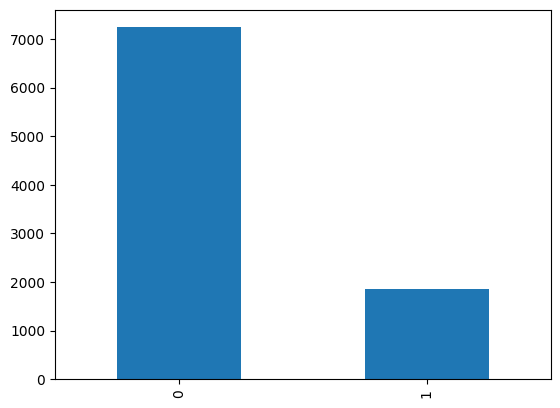

In [12]:
target.value_counts().plot(kind='bar')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, la gráfica muestra correctamente el imbalance de datos.
</div>

Let's make predictions with the imbalance

##  Training and validation datasets

In [13]:
training_features, validation_features, training_target, validation_target = train_test_split(features_scaled, target, test_size=0.25, random_state=12345)

## Prediction models

### Random Forest classification

In [14]:
random_forest_results = pd.DataFrame(columns=['max_depth', 'confusion_matrix', 'f1_score', 'training_score', 'validation_score', 'recall_score', 'precision_score'])
n=1
for depth in range(1, 16):
    model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=20,  class_weight='balanced')
    model.fit(training_features, training_target)
    predicted_values = model.predict(validation_features)
    random_forest_results.loc[n, 'max_depth'] = depth 
    random_forest_results.loc[n, 'confusion_matrix'] = str(confusion_matrix(validation_target, predicted_values)).replace('\n', '*')
    random_forest_results.loc[n, 'f1_score'] = f1_score(validation_target, predicted_values)
    random_forest_results.loc[n, 'training_score'] = model.score(training_features, training_target)
    random_forest_results.loc[n, 'validation_score'] = model.score(validation_features, validation_target)
    random_forest_results.loc[n, 'recall_score'] = recall_score(predicted_values, validation_target)
    random_forest_results.loc[n, 'precision_score'] = precision_score(predicted_values, validation_target)

    n +=1 

random_forest_results

,max_depth,confusion_matrix,f1_score,training_score,validation_score,recall_score,precision_score
1,1,[[1388 434]* [ 155 296]],0.50127,0.7379,0.740871,0.405479,0.656319
2,2,[[1452 370]* [ 133 318]],0.558385,0.771634,0.778707,0.462209,0.7051
3,3,[[1470 352]* [ 126 325]],0.576241,0.787181,0.789705,0.480059,0.720621
4,4,[[1449 373]* [ 119 332]],0.574394,0.789968,0.783546,0.470922,0.736142
5,5,[[1490 332]* [ 123 328]],0.590459,0.805955,0.799824,0.49697,0.727273
6,6,[[1510 312]* [ 129 322]],0.593548,0.820915,0.805983,0.507886,0.713969
7,7,[[1501 321]* [ 122 329]],0.597639,0.830302,0.805103,0.506154,0.72949
8,8,[[1538 284]* [ 145 306]],0.587896,0.853769,0.811263,0.518644,0.678492
9,9,[[1596 226]* [ 161 290]],0.599793,0.88677,0.82974,0.562016,0.643016
10,10,[[1610 212]* [ 171 280]],0.593849,0.908331,0.8315,0.569106,0.620843


Text(0, 0.5, 'TPR')

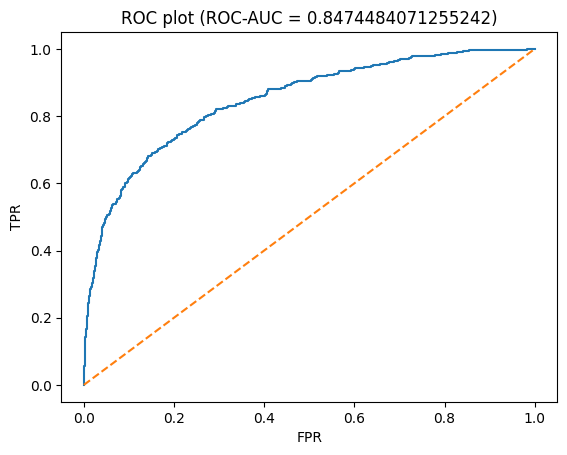

In [15]:
best_forest = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=20, class_weight='balanced')

best_forest.fit(training_features, training_target)
probabilities = best_forest.predict_proba(validation_features)[:, 1]

fpr, tpr, threshold= roc_curve(validation_target, probabilities)
roc_auc = roc_auc_score(validation_target, probabilities)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.title(f'ROC plot (ROC-AUC = {roc_auc})')
plt.xlabel('FPR')
plt.ylabel('TPR')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Perfecto! Con el ciclo for exploraste distintos hiperparámetros para tus datos, algunos de estos modelos incluso ya superan el umbral solicitado de 0.59 en la métrica F1.
</div>

### Logistic regression

Text(0.5, 1.0, 'ROC plot (ROC-AUC = 0.7883262222503474)')

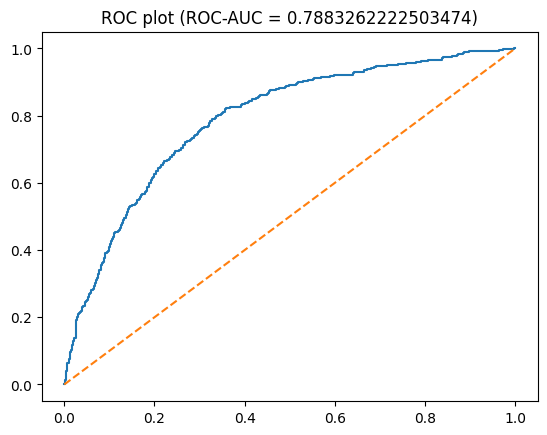

In [16]:
model = LogisticRegression(random_state=12345,  class_weight='balanced')
model.fit(training_features, training_target)

val_prob = model.predict_proba(validation_features)
ones_prob = val_prob[:,1]

logistic_regression_results = pd.DataFrame(columns=['threshold', 'recall_score', 'precision_score', 'recall_score'])
n=0

for threshold in np.arange(0, 0.75, 0.01):
    predicted_values = ones_prob > threshold
    logistic_regression_results.loc[n, 'threshold'] = threshold 
    logistic_regression_results.loc[n, 'confusion_matrix'] = str(confusion_matrix(validation_target, predicted_values)).replace('\n', '*')
    logistic_regression_results.loc[n, 'f1_score'] = f1_score(validation_target, predicted_values)
    logistic_regression_results.loc[n, 'training_score'] = model.score(training_features, training_target)
    logistic_regression_results.loc[n, 'validation_score'] = model.score(validation_features, validation_target)
    logistic_regression_results.loc[n, 'recall_score'] = recall_score(predicted_values, validation_target)
    logistic_regression_results.loc[n, 'precision_score'] = precision_score(predicted_values, validation_target)
    n += 1
    
logistic_regression_results

fpr, tpr, threshold = roc_curve(validation_target, ones_prob)
roc_auc = roc_auc_score(validation_target, ones_prob)


plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.title(f'ROC plot (ROC-AUC = {roc_auc})')

In [17]:
logistic_regression_results['f1_score'].idxmax()

54

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. Se exploró correctamente el modelo de regresión logística, el cual naturalmente tiene peor desempeño que random forest.
</div>

## Balancing

### Downsampling

In [18]:
def downsampling(features, target, fraction):
    features_ones = features[target==1] 
    features_zeros = features[target==0] 
    target_zeros = target[target==0]
    target_ones = target[target==1]
    
    features_zeros_sample = features_zeros.sample(frac = fraction, random_state=12345)
    target_zeros_sample = target_zeros.sample(frac=fraction, random_state=12345)
    downsized_features = pd.concat([features_zeros_sample]+[features_ones])
    downsized_target = pd.concat([target_zeros_sample]+[target_ones])
    return shuffle(downsized_features, downsized_target, random_state=12345)
    

In [19]:
balanced_features, balanced_target = downsampling(features, target, 0.25)
print(balanced_target.value_counts())
print(balanced_features.shape)

1    1854
0    1809
Name: Exited, dtype: int64
(3663, 13)


In [20]:
b_training_features, b_validation_features, b_training_target, b_validation_target = train_test_split(balanced_features, balanced_target, test_size=0.25, random_state=12345)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, se aplicó correctamente el downsampling.
</div>

#### Models

##### Random Forest Classifier

In [21]:
random_forest_results = pd.DataFrame(columns=['max_depth', 'confusion_matrix', 'f1_score', 'training_score', 'validation_score', 'recall_score', 'precision_score'])
n=1
best_f1 = 0
best_model = None
for depth in range(1, 16):
    model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=20)
    model.fit(b_training_features, b_training_target)
    b_predicted_values = model.predict(b_validation_features)
    random_forest_results.loc[n, 'max_depth'] = depth 
    random_forest_results.loc[n, 'confusion_matrix'] = str(confusion_matrix(b_validation_target, b_predicted_values)).replace('\n', '*')
    current_f1_score = f1_score(b_validation_target, b_predicted_values)
    random_forest_results.loc[n, 'f1_score'] =  current_f1_score
    random_forest_results.loc[n, 'training_score'] = model.score(b_training_features, b_training_target)
    random_forest_results.loc[n, 'validation_score'] = model.score(b_validation_features, b_validation_target)
    random_forest_results.loc[n, 'recall_score'] = recall_score(b_predicted_values, b_validation_target)
    random_forest_results.loc[n, 'precision_score'] = precision_score(b_predicted_values, b_validation_target)
    if  current_f1_score > best_f1:
        best_model = model
        best_f1 = current_f1_score
    n += 1
random_forest_results

,max_depth,confusion_matrix,f1_score,training_score,validation_score,recall_score,precision_score
1,1,[[319 121]* [136 340]],0.72572,0.709865,0.719432,0.737527,0.714286
2,2,[[331 109]* [127 349]],0.747323,0.732071,0.742358,0.762009,0.733193
3,3,[[335 105]* [115 361]],0.766454,0.771023,0.759825,0.774678,0.758403
4,4,[[341 99]* [119 357]],0.766094,0.772479,0.762009,0.782895,0.75
5,5,[[328 112]* [113 363]],0.763407,0.788497,0.754367,0.764211,0.762605
6,6,[[333 107]* [112 364]],0.768743,0.816527,0.760917,0.772824,0.764706
7,7,[[341 99]* [127 349]],0.755411,0.836549,0.753275,0.779018,0.733193
8,8,[[349 91]* [119 357]],0.772727,0.860211,0.770742,0.796875,0.75
9,9,[[350 90]* [119 357]],0.773564,0.891882,0.771834,0.798658,0.75
10,10,[[330 110]* [117 359]],0.759788,0.925373,0.752183,0.765458,0.754202


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! Los resultados ahora son mucho mejor.
</div>

###### ROC curve

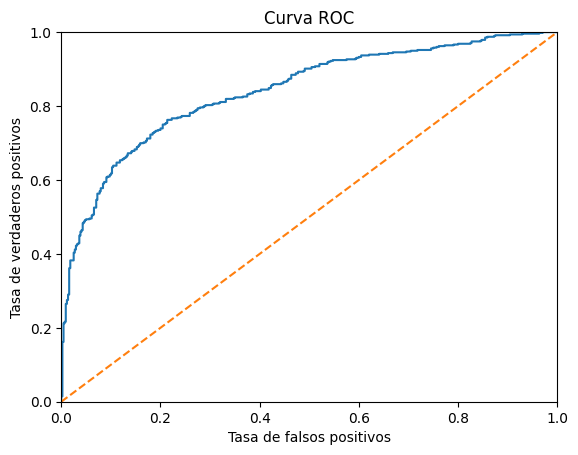

AUC-ROC: 0.8400424942704355


In [22]:

model = best_model
probabilities_valid = model.predict_proba(b_validation_features)[:, 1]
fpr, tpr, thresholds = roc_curve(b_validation_target, probabilities_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

auc_roc = roc_auc_score(b_validation_target, probabilities_valid)
print(f'AUC-ROC: {auc_roc}')    

##### Logistic Regression binary classification

In [23]:
model = LogisticRegression(random_state=12345)
model.fit(b_training_features, b_training_target)

val_prob = model.predict_proba(b_validation_features)
ones_prob = val_prob[:,1]

logistic_regression_results = pd.DataFrame(columns=['threshold', 'recall_score', 'precision_score', 'recall_score'])
n=0

best_model = None
best_f1_score = 0


for threshold in np.arange(0, 0.75, 0.01):
    b_predicted_values = ones_prob > threshold
    logistic_regression_results.loc[n, 'threshold'] = threshold 
    logistic_regression_results.loc[n, 'confusion_matrix'] = str(confusion_matrix(b_validation_target, b_predicted_values)).replace('\n', '*')
    
    current_f1_score = f1_score(b_validation_target, b_predicted_values)
    
    logistic_regression_results.loc[n, 'f1_score'] = current_f1_score
    logistic_regression_results.loc[n, 'training_score'] = model.score(b_training_features, b_training_target)
    logistic_regression_results.loc[n, 'validation_score'] = model.score(b_validation_features, b_validation_target)
    logistic_regression_results.loc[n, 'recall_score'] = recall_score(b_predicted_values, b_validation_target)
    logistic_regression_results.loc[n, 'precision_score'] = precision_score(b_predicted_values, b_validation_target)
    
    if current_f1_score> best_f1_score:
        best_f1_score = current_f1_score
        best_model = model
    
    n += 1
    
logistic_regression_results


,threshold,recall_score,precision_score,recall_score,confusion_matrix,f1_score,training_score,validation_score
0,0.0,0.519651,1.0,0.519651,[[ 0 440]* [ 0 476]],0.683908,0.704041,0.720524
1,0.01,0.519651,1.0,0.519651,[[ 0 440]* [ 0 476]],0.683908,0.704041,0.720524
2,0.02,0.519651,1.0,0.519651,[[ 0 440]* [ 0 476]],0.683908,0.704041,0.720524
3,0.03,0.519651,1.0,0.519651,[[ 0 440]* [ 0 476]],0.683908,0.704041,0.720524
4,0.04,0.519651,1.0,0.519651,[[ 0 440]* [ 0 476]],0.683908,0.704041,0.720524
...,...,...,...,...,...,...,...,...
70,0.7,0.832579,0.386555,0.832579,[[403 37]* [292 184]],0.527977,0.704041,0.720524
71,0.71,0.84466,0.365546,0.84466,[[408 32]* [302 174]],0.510264,0.704041,0.720524
72,0.72,0.835052,0.340336,0.835052,[[408 32]* [314 162]],0.483582,0.704041,0.720524
73,0.73,0.832432,0.323529,0.832432,[[409 31]* [322 154]],0.465961,0.704041,0.720524


In [24]:
logistic_regression_results.iloc[logistic_regression_results['f1_score'].idxmax()]

threshold                             0.37
recall_score                      0.652313
precision_score                   0.859244
recall_score                      0.652313
confusion_matrix    [[222 218]* [ 67 409]]
f1_score                          0.741614
training_score                    0.704041
validation_score                  0.720524
Name: 37, dtype: object

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, el downsample sirvió, aunque no se recomienda mucho pues se puede llegar a perder información al descartar datos.
</div>

###### ROC curve

0.7810828877005347


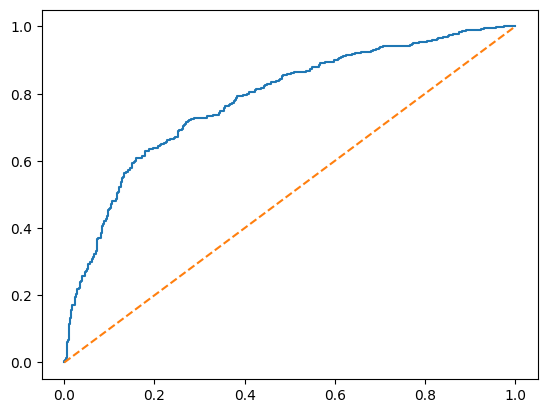

In [25]:
model = best_model

probabilities_valid = model.predict_proba(b_validation_features)[:, 1]
tpr, fpr, threshold = roc_curve(b_validation_target, probabilities_valid)


plt.figure()
plt.plot(tpr, fpr)
plt.plot([0,1], [0,1], linestyle='--')
print(roc_auc_score(b_validation_target, probabilities_valid))

### Upsample

In [26]:
def upsample(features, target, repeat):
    features_ones = features[target==1]
    features_zeros = features[target==0]
    target_ones = target[target==1]
    target_zeros = target[target==0]
    
    features_upsampled = pd.concat([features_zeros]+[features_ones]*repeat)
    target_upsampled = pd.concat([target_zeros]+[target_ones]*repeat)
    
    return shuffle(features_upsampled, target_upsampled, random_state=12345)

In [27]:
balanced_features, balanced_target = upsample(features, target, 4)
print(balanced_target.value_counts())
print(balanced_features.shape)

1    7416
0    7237
Name: Exited, dtype: int64
(14653, 13)


In [28]:
b_up_training_features, b_up_validation_features, b_up_training_target, b_up_validation_target = train_test_split(balanced_features, balanced_target, test_size=0.25, random_state=12345)

#### Models

##### Random Forest Classifier

In [29]:
random_forest_results = pd.DataFrame(columns=['max_depth', 'confusion_matrix', 'f1_score', 'training_score', 'validation_score', 'recall_score', 'precision_score', 'roc_auc'])
n=1
for depth in range(1, 16):
    model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=20)
    model.fit(b_up_training_features, b_up_training_target)
    b_up_predicted_values = model.predict(b_up_validation_features)
    b_up_probabilities_predicted = model.predict_proba(b_up_validation_features)[:, 1]
    random_forest_results.loc[n, 'max_depth'] = depth 
    random_forest_results.loc[n, 'confusion_matrix'] = str(confusion_matrix(b_up_validation_target, b_up_predicted_values)).replace('\n', '*')
    random_forest_results.loc[n, 'f1_score'] = f1_score(b_up_validation_target, b_up_predicted_values)
    random_forest_results.loc[n, 'training_score'] = model.score(b_up_training_features, b_up_training_target)
    random_forest_results.loc[n, 'validation_score'] = model.score(b_up_validation_features, b_up_validation_target)
    random_forest_results.loc[n, 'recall_score'] = recall_score(b_up_predicted_values, b_up_validation_target)
    random_forest_results.loc[n, 'precision_score'] = precision_score(b_up_predicted_values, b_up_validation_target)
    random_forest_results.loc[n, 'roc_auc'] = roc_auc_score(b_up_validation_target,b_up_probabilities_predicted)
    
    n += 1
random_forest_results

,max_depth,confusion_matrix,f1_score,training_score,validation_score,recall_score,precision_score,roc_auc
1,1,[[1305 449]* [ 652 1258]],0.695604,0.71699,0.699509,0.736965,0.658639,0.781908
2,2,[[1380 374]* [ 647 1263]],0.712151,0.737192,0.721343,0.771533,0.661257,0.805118
3,3,[[1352 402]* [ 540 1370]],0.744161,0.757758,0.742904,0.773138,0.717277,0.818796
4,4,[[1397 357]* [ 566 1344]],0.744392,0.763855,0.74809,0.790123,0.703665,0.83194
5,5,[[1404 350]* [ 527 1383]],0.759264,0.780053,0.760644,0.798038,0.724084,0.841722
6,6,[[1399 355]* [ 480 1430]],0.774019,0.793612,0.772107,0.80112,0.748691,0.856837
7,7,[[1434 320]* [ 481 1429]],0.781088,0.804532,0.781386,0.817038,0.748168,0.871145
8,8,[[1449 305]* [ 423 1487]],0.80335,0.830558,0.80131,0.829799,0.778534,0.88489
9,9,[[1432 322]* [ 396 1514]],0.808329,0.851488,0.804039,0.824619,0.79267,0.899025
10,10,[[1474 280]* [ 331 1579]],0.837888,0.883338,0.833242,0.849381,0.826702,0.91891


Text(0.5, 1.0, 'Upsample with Random Forest Classifier ROC plot (ROC-AUC = 0.983714859677506 )')

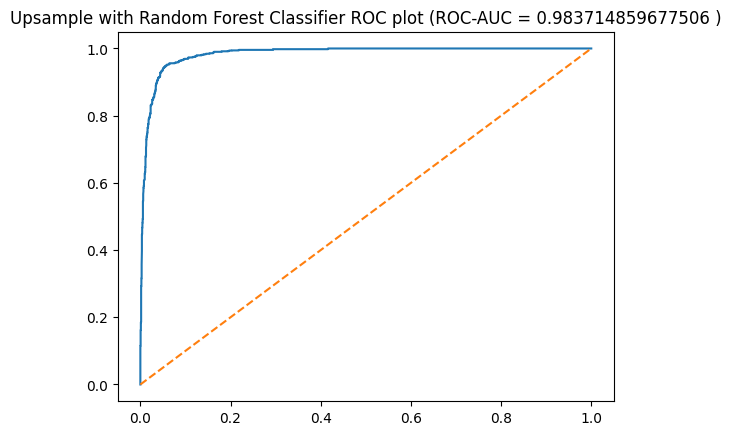

In [30]:
best_model = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=15)
best_model.fit(b_up_training_features, b_up_training_target)

probabilities = best_model.predict_proba(b_up_validation_features)[:,1]

fpr, tpr, threshold = roc_curve(b_up_validation_target, probabilities)
roc_auc = roc_auc_score(b_up_validation_target, probabilities)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.title(f'Upsample with Random Forest Classifier ROC plot (ROC-AUC = {roc_auc} )')

##### Logistic REgression Classifier

In [31]:
model = LogisticRegression(random_state=12345)
model.fit(b_up_training_features, b_up_training_target)

val_prob = model.predict_proba(b_up_validation_features)
ones_prob = val_prob[:,1]

logistic_regression_results = pd.DataFrame(columns=['threshold', 'recall_score', 'precision_score', 'recall_score', 'auc_roc'])
n=0

for threshold in np.arange(0, 0.75, 0.01):
    b_predicted_values = ones_prob > threshold
    logistic_regression_results.loc[n, 'threshold'] = threshold 
    logistic_regression_results.loc[n, 'confusion_matrix'] = str(confusion_matrix(b_up_validation_target, b_up_predicted_values)).replace('\n', '*')
    logistic_regression_results.loc[n, 'f1_score'] = f1_score(b_up_validation_target, b_up_predicted_values)
    logistic_regression_results.loc[n, 'training_score'] = model.score(b_up_training_features, b_up_training_target)
    logistic_regression_results.loc[n, 'validation_score'] = model.score(b_up_validation_features, b_up_validation_target)
    logistic_regression_results.loc[n, 'recall_score'] = recall_score(b_up_predicted_values, b_up_validation_target)
    logistic_regression_results.loc[n, 'precision_score'] = precision_score(b_up_predicted_values, b_up_validation_target)
    logistic_regression_results.loc[n, 'auc_roc'] = roc_auc_score(b_up_validation_target, ones_prob)
    
    n += 1
    
logistic_regression_results


,threshold,recall_score,precision_score,recall_score,auc_roc,confusion_matrix,f1_score,training_score,validation_score
0,0.0,0.906387,0.973298,0.906387,0.758306,[[1562 192]* [ 51 1859]],0.938652,0.711439,0.698144
1,0.01,0.906387,0.973298,0.906387,0.758306,[[1562 192]* [ 51 1859]],0.938652,0.711439,0.698144
2,0.02,0.906387,0.973298,0.906387,0.758306,[[1562 192]* [ 51 1859]],0.938652,0.711439,0.698144
3,0.03,0.906387,0.973298,0.906387,0.758306,[[1562 192]* [ 51 1859]],0.938652,0.711439,0.698144
4,0.04,0.906387,0.973298,0.906387,0.758306,[[1562 192]* [ 51 1859]],0.938652,0.711439,0.698144
...,...,...,...,...,...,...,...,...,...
70,0.7,0.906387,0.973298,0.906387,0.758306,[[1562 192]* [ 51 1859]],0.938652,0.711439,0.698144
71,0.71,0.906387,0.973298,0.906387,0.758306,[[1562 192]* [ 51 1859]],0.938652,0.711439,0.698144
72,0.72,0.906387,0.973298,0.906387,0.758306,[[1562 192]* [ 51 1859]],0.938652,0.711439,0.698144
73,0.73,0.906387,0.973298,0.906387,0.758306,[[1562 192]* [ 51 1859]],0.938652,0.711439,0.698144


Text(0.5, 1.0, 'Upsample with logistic regression ROC-AUC = 0.7583062200385655')

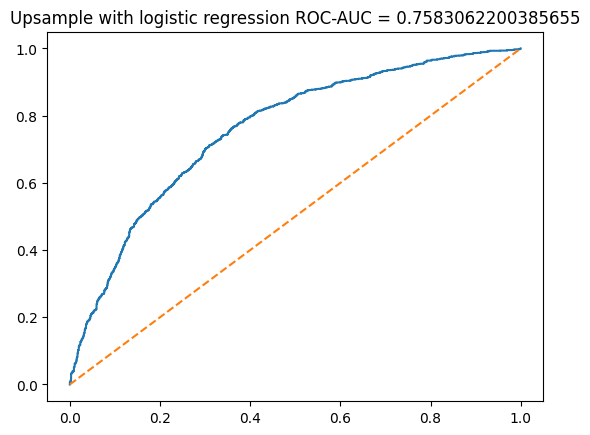

In [32]:
fpr, tpr, threshold = roc_curve(b_up_validation_target, ones_prob)

roc_auc = roc_auc_score(b_up_validation_target, ones_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.title(f'Upsample with logistic regression ROC-AUC = {roc_auc}')

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy buen trabajo! Realizaste correctamente el upsample, aunque creo que el conjunto de datos que usaste para entrenar es el mismo que se uso para el downsample, porque se llama `b_training_features, b_training_target` y el del upsample se llama `balanced_features, balanced_target`.
</div>

<div class='alert alert-info'>
Los datasets han sido modificados</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! Ahora solo falta el final, realizar un análisis de la curva roc, te dejo un ejemplo de como graficarla:
    
```

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

probabilities_valid = model.predict_proba(features_valid)[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_valid)
print(f'AUC-ROC: {auc_roc}')    
    
```
    
También faltaría seleccionar un módelo con un desempeño mejor al umbral de 0.59 en el score F1, y realizar tus conclusiones. Sé que podrás realizar esto de manera satisfactoria.
</div>

<div class='alert alert-info'>Graficas incluidas</div>

## Conclusion

Based on the gathered data, we could conclude that Random forest classifiers works really well with upsampled data (in case of using unbalanced data). In our particular case a depth of 15 along with 20 estimators scores a 0.98 using ROC-AUC technique. In the other hand, logistic regression does not significatively improves neither using downsampling or upsampling. 
Data scaling and data encoding also contributes to optimize model performance. 

<div class='alert alert-info'>Estimado Marcos, Se han incluido la mayorias de los cambios solicitados. Algunos detalles deben ser corregidos:
    <ul>
        <li>El codigo no sigue las mejores practicas: Los nombres de las variables son muy largos. Codigo repetitivo puede ser agrupado en funciones.</li>
          <li>Graficas deben mejorar</li>
    </ul>
    <p>Estos ultimos días he tenido relativamente poco tiempo para adelantar trabajos en plataforma, pero los ajustes serán incluidos en la versión que será cargada al repo.</p>
    <b>Muchas gracias por tomarse el tiempo de revisar mi trabajo, muchos exitos</b>
</div>

<div class='alert alert-info'>
    Estimado Marcos, gracias por tu tiempo. No he podido encontrar las correcciones por las cuales el proyecto ha sido devuelto. Al entrar en la plataforma hay un mensaje advirtiendo de una migración que podría ocasionar perdida en el avance de proyectos, no sé si esta sea la razón por la cual no se vén reflejadas las sugerencias y correcciones. Agradecería que en caso de ser necesarias nuevas modificaciones, sean incluidas en el documento nuevamente para finalizar este sprint. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola! El único comentario que realicé fue que en las conclusiones se debería mostrar un modelo que supere el umbral solicitado de 0.59 en el score F1. Pero es un cambio pequeño, puedo aprobar tu proyecto sin problemas.
    
Saludos, Marcos.
</div>